In [9]:
import gpxpy
import pandas as pd
import gpxpy, geopandas, json
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
import haversine
import numpy
from geopy import distance
import arrow
from math import sqrt, floor
from geopandas import GeoDataFrame
from shapely.geometry import Point, LineString
from ipyleaflet import Map, GeoData, basemaps, LayersControl, AntPath
from IPython.display import Image
from matplotlib.pylab import rcParams
from ipyleaflet import Map, GeoJSON, GeoData
import plotly.express as px

with open('092123032021.gpx', 'r') as g:
    gpx = gpxpy.parse(g)
data = gpx.tracks[0].segments[0].points
frame = pd.DataFrame(columns=['lon', 'lat', 'speed', 'time'])
for point in data:
        frame = frame.append({'lon': point.longitude, 'lat' : point.latitude, 'speed' : point.speed * 3.6, 'time' : arrow.get(point.time).to('Europe/Kiev')}, ignore_index=True)
frame['time'] = frame['time'].astype(str).str[:-6]
frame['time'] = pd.to_datetime(frame['time'], dayfirst=True)
frame.set_index('time')


,lon,lat,speed
time,,,
2021-03-23 06:37:17,37.585798,48.759932,5.616
2021-03-23 06:37:27,37.585997,48.759902,5.652
2021-03-23 06:37:37,37.586215,48.759877,5.652
2021-03-23 06:37:47,37.586372,48.759822,5.292
2021-03-23 06:39:31,37.586448,48.759866,4.860
...,...,...,...
2021-03-23 17:47:08,37.586488,48.759627,12.600
2021-03-23 17:47:13,37.586426,48.759752,4.068
2021-03-23 17:47:18,37.586432,48.759783,3.672


График измнения скорости c 15:30 по 15:50


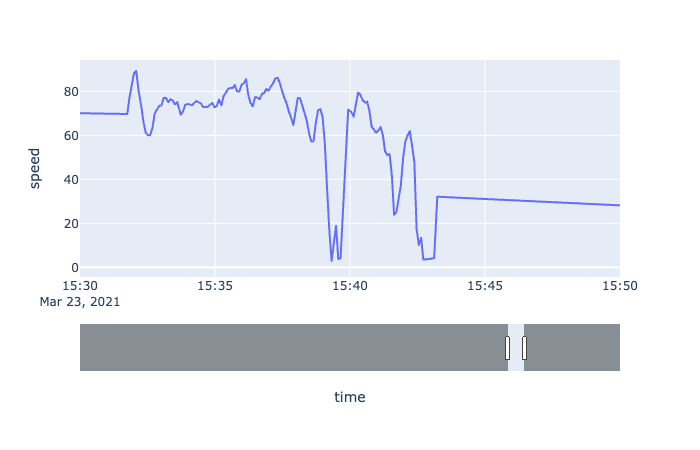

In [12]:
fig = px.line(frame, x='time', y="speed", range_x=['2021-03-23 15:30:00','2021-03-23 15:50:00'])
fig.update_xaxes(rangeslider_visible=True)
print('График измнения скорости c 15:30 по 15:50')
Image(filename='speed.png')


Маршрут с 15:30 до 15:50, дистанция - 11.14 км


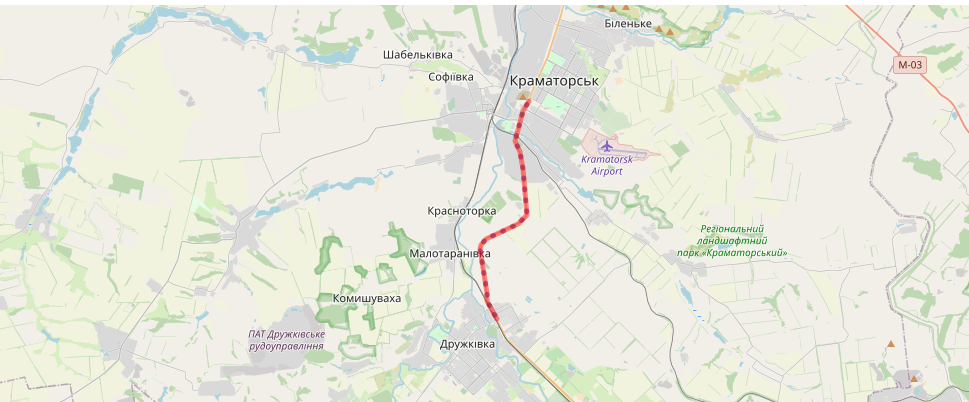

In [13]:
loc = frame[frame.time.between('2021-03-23 15:30:00', '2021-03-23 15:50:00')]
ants = loc[['lat','lon']].to_numpy().tolist()
ant_path = AntPath(
    locations=ants,
    dash_array=[1, 10],
    delay=3000,
    color='#FF0D00',
    pulse_color='#870047'
)

m = Map(center=(ants[30][0], ants[30][1]),zoom=12)
m.add_layer(ant_path)
begin = ants[0]
end = ants[len(ants)-1]

print('Маршрут с 15:30 до 15:50, дистанция - {} км'.format(round(distance.distance(begin,end).km, 2)))
Image(filename='route.png')

In [4]:
print('последние точки маршрута')
loc.tail(10)

последние точки маршрута


,lon,lat,speed,time
1614,37.562863,48.724240,55.116002,2021-03-23 15:42:18
1615,37.563160,48.724826,47.951999,2021-03-23 15:42:23
1616,37.563341,48.725173,17.316000,2021-03-23 15:42:28
1617,37.563459,48.725309,10.116000,2021-03-23 15:42:33
1618,37.563536,48.725492,13.392000,2021-03-23 15:42:38
1619,37.563619,48.725669,3.528000,2021-03-23 15:42:43
1620,37.563785,48.726059,3.600000,2021-03-23 15:42:48
1621,37.564325,48.726428,3.816000,2021-03-23 15:42:58
1622,37.564417,48.726588,4.248000,2021-03-23 15:43:07
1623,37.566731,48.729650,32.112000,2021-03-23 15:43:14
